In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from import_me import *

In [2]:
path = "8db.data"

In [3]:
with open("../11-04-2019 RTL/red_dot.bmp", "rb") as f:
    b = f.read()
orig = np.frombuffer(b, dtype = np.uint8)

preamble = orig[:122].copy()
bitPreamble = np.unpackbits(preamble)

In [4]:
preamble

array([ 66,  77, 122,   0,   3,   0,   0,   0,   0,   0, 122,   0,   0,
         0, 108,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,
         1,   0,  24,   0,   0,   0,   0,   0,   0,   0,   3,   0,  19,
        11,   0,   0,  19,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  66,  71,  82, 115,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype=uint8)

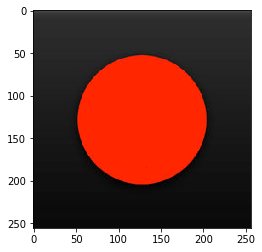

In [5]:
array = readSave(readfileName = path)
plt.imshow(plt.imread("output.bmp"))

In [6]:
with open(path, "rb") as f:
    file = f.read()
    
rcv = np.frombuffer(file, dtype = np.uint8)

In [7]:
def findBitShift_and_Begin2(rcv_bitmap):
    for i in range(8):
        aux = search_sequence_numpy(np.packbits(np.roll(np.unpackbits(rcv_bitmap), i)), np.array([66, 77]))
        if len(aux) != 0:
            yield (i, aux)

In [8]:
for a in findBitShift_and_Begin2(rcv):
    print(a)

(0, array([172800, 172801]))


In [9]:
#tupla = findBitShift_and_Begin2(rcv)
#print(tupla)
gravar = np.roll(np.packbits(np.roll(np.unpackbits(rcv), 7)), -20011)

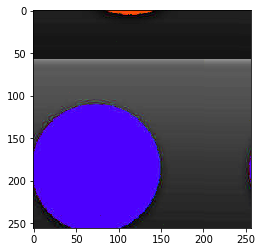

In [10]:
plt.imshow(np.flipud(cv2.cvtColor(gravar[122:].reshape(256, 256, 3), cv2.COLOR_BGR2RGB)))

In [11]:
rcv = rcv[122:]

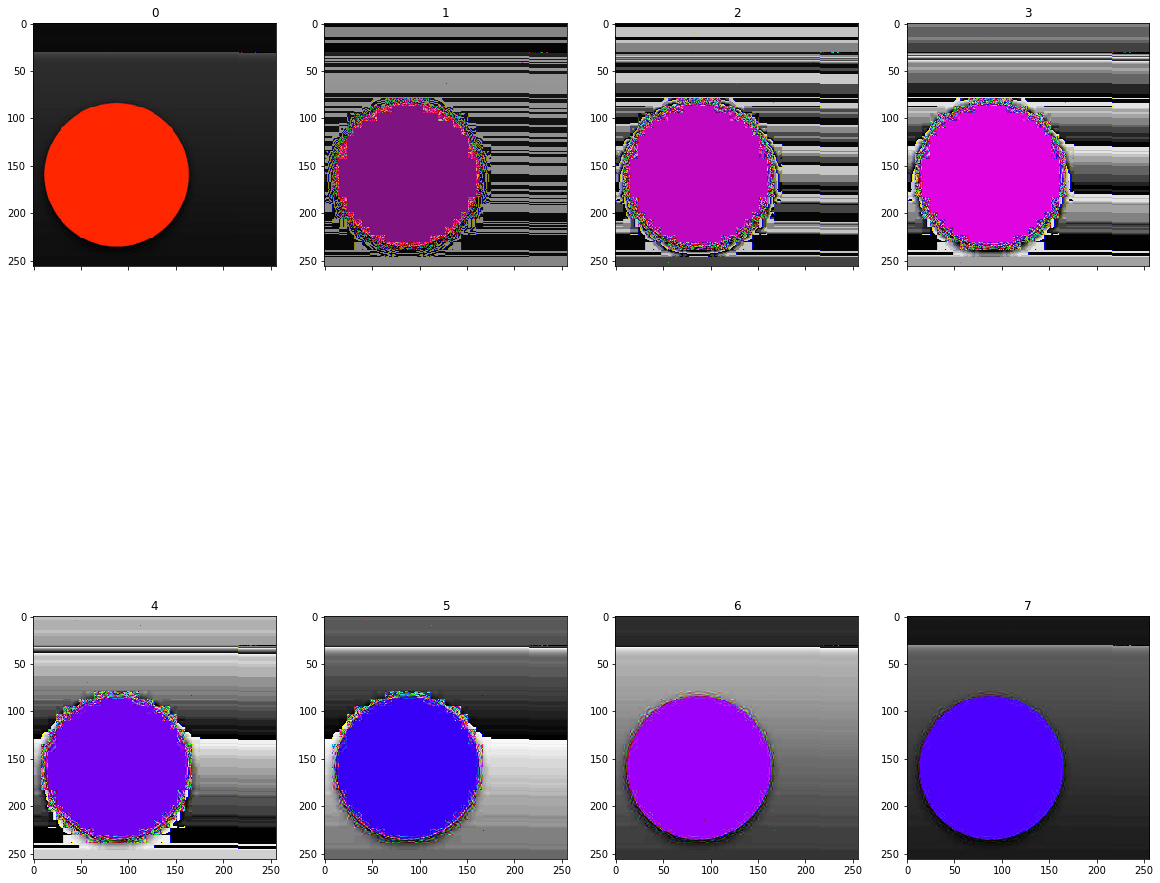

In [12]:
fig, ax = plt.subplots(2, 4, sharex=True, figsize=(20, 20))

#0, 1, 2
roll_cor = 2

for i in range(8):
    rcv_t = np.roll(np.packbits(np.roll(np.unpackbits(rcv), i)), roll_cor)
    ax[i//4, i%4].set_title(i)
    ax[i//4, i%4].imshow(np.flipud(cv2.cvtColor(rcv_t.reshape(256, 256, 3), cv2.COLOR_BGR2RGB)))

In [13]:
findBitShift_and_Begin(rcv)

(0, 172678)

In [14]:
##################

In [15]:
bit_error = 196730 * 8 - np.sum(np.equal(np.unpackbits(array), np.unpackbits(orig)))

In [16]:
bit_error*100/(196730 * 8)

0.0024144766939460174

In [17]:
np.equal(np.unpackbits(array), np.unpackbits(orig))

array([ True,  True,  True, ...,  True,  True,  True])

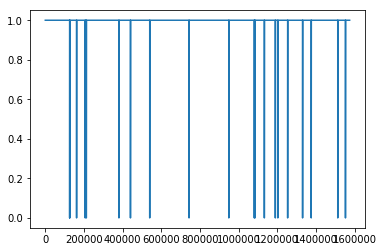

In [18]:
plt.plot(np.equal(np.unpackbits(array), np.unpackbits(orig)))